In [28]:
from data import get_dataset
from config import Config
import matplotlib.pyplot as plt
import librosa
import torch

In [21]:
config = Config()
config.data.envelope_min = 0.01

In [22]:
dataset, dataloader = get_dataset(config, split='test')

In [23]:
waveform, mel_spec, M = dataset.__getitem__(0)

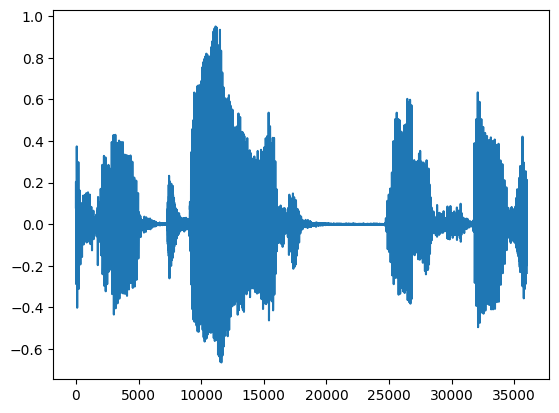

In [24]:
plt.plot(waveform)

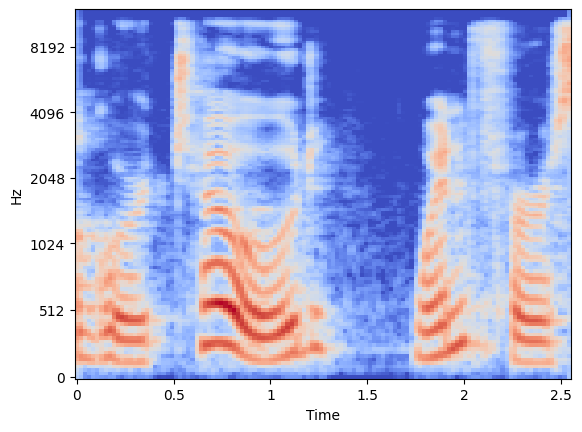

In [25]:
librosa.display.specshow(librosa.power_to_db(mel_spec), 
                         x_axis="time",
                         y_axis="mel", 
                         sr=config.data.sampling_rate)

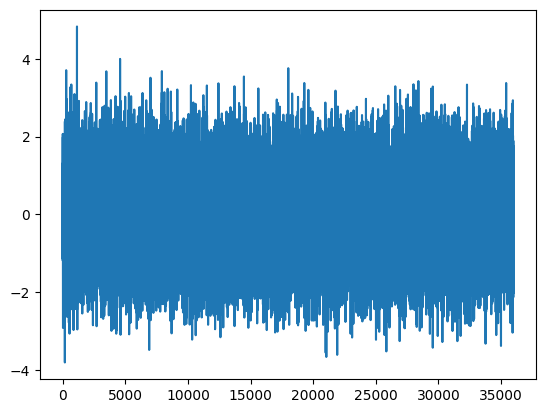

In [29]:
noise = torch.randn_like(waveform)
plt.plot(noise)

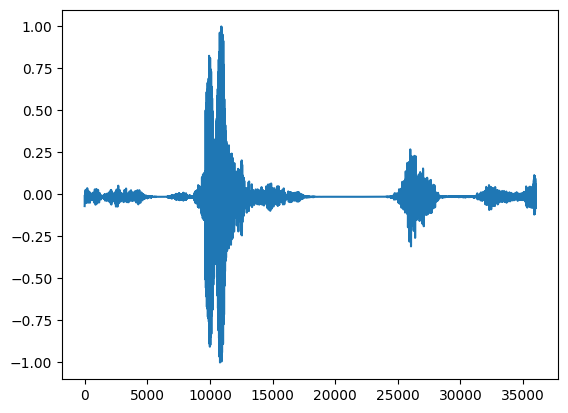

In [45]:
# TODO: output here seems a bit wrong
from data.preprocess import transform_noise
transformed_noise = transform_noise(M, noise, n_fft=config.data.n_fft, window_length=config.data.window_length, hop_length=config.data.hop_length, post_norm=True)
transformed_noise = transformed_noise * 2.0 - 1.0
plt.plot(transformed_noise)

In [34]:
from diffusers import DDPMScheduler
noise_scheduler = DDPMScheduler(
        config.model.max_timesteps,
        beta_start=config.training.beta_start,
        beta_end=config.training.beta_end,
        beta_schedule=config.training.beta_schedule,
    )

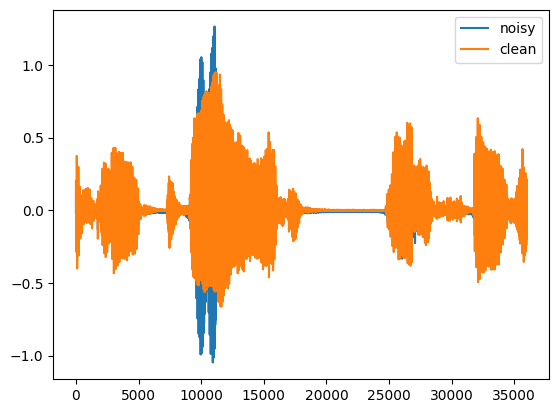

In [49]:
timestep = 49
timestep = torch.LongTensor([timestep])
noisy_waveform = noise_scheduler.add_noise(waveform, transformed_noise, timestep)
plt.plot(noisy_waveform, label='noisy')
plt.plot(waveform, label='clean')
plt.legend()
plt.show()